## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### 1) Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from __future__ import absolute_import, division, print_function
import numpy as np
import keras

Using TensorFlow backend.


In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

##### Setting label name to FMNIST dataset

In [3]:
labelNames = ['Top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

##### Plotting samples from FMNIST dataset

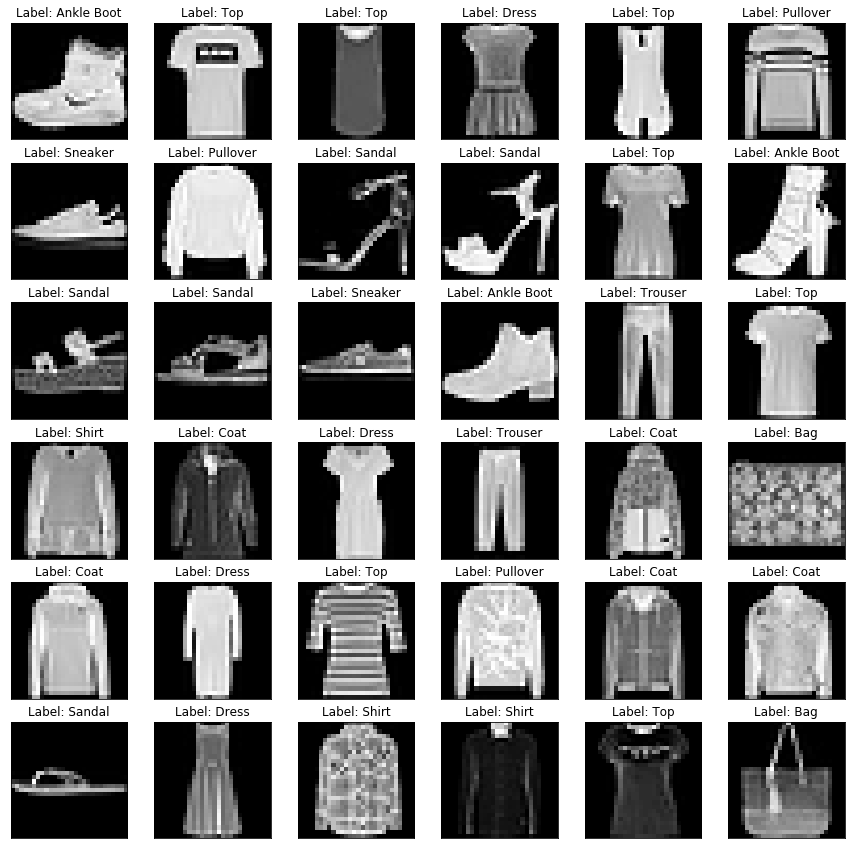

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15, 15))
columns = 6
rows = 6
for i in range(1, columns*rows +1):
    img = x_train[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.title("Label: {}".format(labelNames[y_train[i-1]]))
    plt.xticks([])
    plt.yticks([])
plt.show()

### 2) Find no.of samples are there in training and test datasets

In [5]:
print(x_train.shape[0], 'Samples in Training set')
print(x_test.shape[0], 'Samples in Testing set')

60000 Samples in Training set
10000 Samples in Testing set


### 3) Find dimensions of an image in the dataset

In [6]:
print('Dataset Dimension :',x_train.shape)

Dataset Dimension : (60000, 28, 28)


In [7]:
print('Image Dimension :',x_train[0].shape)
print('Image Height    :',x_train[0].shape[0])
print('Image Width     :',x_train[0].shape[1])

Image Dimension : (28, 28)
Image Height    : 28
Image Width     : 28


### 4) Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [8]:
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [9]:
np.unique(y_test,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000, 1000],
       dtype=int64))

##### Observe that there are 10 classes in FMNIST data, each of these 10 classes has 6000 samples in train set and 1000 samples in test set.

In [10]:
print(y_train[5])

2


In [11]:
from keras.utils import np_utils

In [12]:
y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

In [13]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [14]:
print(y_train[5])

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


### 5) Normalize both the train and test image data from 0-255 to 0-1

In [15]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

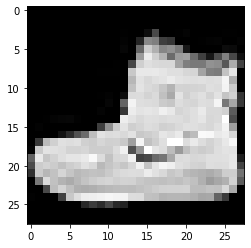

In [16]:
plt.imshow(x_train[0], cmap='gray')

In [17]:
x_train=x_train/255
x_test=x_test/255

In [18]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

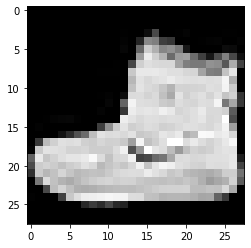

In [19]:
plt.imshow(x_train[0], cmap='gray')

##### Observe that no information loss after the image data is normalized.

### 6) Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [20]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [21]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

In [22]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


### 7) Import the necessary layers from keras to build the model

In [23]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping

### 8) Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [24]:
input_shape = (x_train[0].shape[0], x_train[0].shape[1], x_train[0].shape[2])
print(input_shape)

(28, 28, 1)


In [25]:
model1 = Sequential()

#Conv1 with 32 filters of size 3x3 and relu activation 
model1.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape,
                  name='Conv_Layer_1'))

#Conv2 with 32 filters of size 3x3 and relu activation 
model1.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  name='Conv_Layer_2'))

#Flatten the feature maps from above convolutions
model1.add(Flatten(name='Flatten_Layer'))

#Fully Connected Layer with 128 neurons and relu activation
model1.add(Dense(128, activation='relu',name='FullyConnected_Layer_1'))

#Fully Connected Layer with 10 neurons and softmax activation
model1.add(Dense(10, activation='softmax',name='FullyConnected_Layer_2'))

In [26]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_Layer_1 (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
Conv_Layer_2 (Conv2D)        (None, 24, 24, 32)        9248      
_________________________________________________________________
Flatten_Layer (Flatten)      (None, 18432)             0         
_________________________________________________________________
FullyConnected_Layer_1 (Dens (None, 128)               2359424   
_________________________________________________________________
FullyConnected_Layer_2 (Dens (None, 10)                1290      
Total params: 2,370,282
Trainable params: 2,370,282
Non-trainable params: 0
_________________________________________________________________


In [27]:
from keras.optimizers import Adam
from keras.losses import categorical_crossentropy

optimizer = Adam(lr=0.001)

model1.compile(loss=categorical_crossentropy,
               optimizer=optimizer,
               metrics=['accuracy'])

In [28]:
early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.001, patience=5)

In [29]:
fit_info1=model1.fit(x_train, y_train, epochs=10, batch_size=32,
              validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 126s 2ms/step - loss: 0.3654 - accuracy: 0.8688 - val_loss: 0.2903 - val_accuracy: 0.8960
Epoch 2/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.2294 - accuracy: 0.9148 - val_loss: 0.2612 - val_accuracy: 0.9034
Epoch 3/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.1662 - accuracy: 0.9377 - val_loss: 0.2397 - val_accuracy: 0.9153
Epoch 4/10
60000/60000 [==============================] - 111s 2ms/step - loss: 0.1160 - accuracy: 0.9566 - val_loss: 0.2463 - val_accuracy: 0.9155
Epoch 5/10
60000/60000 [==============================] - 113s 2ms/step - loss: 0.0773 - accuracy: 0.9707 - val_loss: 0.3337 - val_accuracy: 0.9058
Epoch 6/10
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0499 - accuracy: 0.9821 - val_loss: 0.3685 - val_accuracy: 0.9158
Epoch 7/10
60000/60000 [==============================] - 115s

In [30]:
print('**** Model only with Conv and FC layers *****')
train_score = model1.evaluate(x_train, y_train)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

**** Model only with Conv and FC layers *****
60000/60000 [==============================] - 30s 499us/step
Train loss: 0.02025570011914824
Train accuracy: 0.9928333163261414


In [31]:
test_score = model1.evaluate(x_test, y_test)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

10000/10000 [==============================] - 5s 487us/step
Test loss: 0.47769083328321577
Test accuracy: 0.9064000248908997


In [32]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['accuracy'])+1),model_history.history['accuracy'])
    axs[0].plot(range(1,len(model_history.history['val_accuracy'])+1),model_history.history['val_accuracy'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['accuracy'])+1),len(model_history.history['accuracy'])/10)
    axs[0].legend(['train', 'validation'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'validation'], loc='best')
    plt.show()

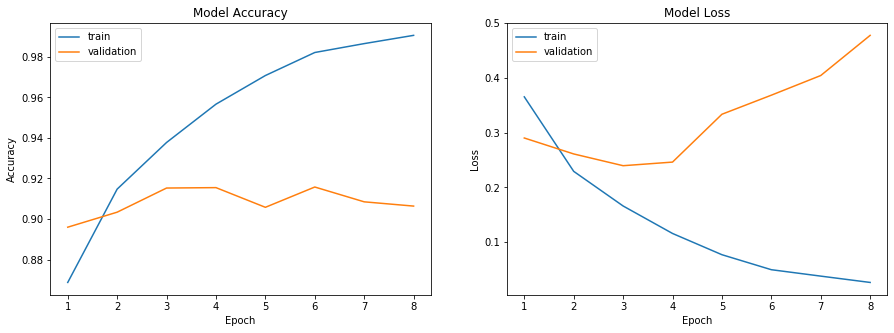

In [33]:
plot_model_history(fit_info1)

##### Observe in model accuracy/loss plot, that model performance is not consistent across in validation

### 9) Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [34]:
model2 = Sequential()

#Conv1 with 32 filters of size 3x3 and relu activation 
model2.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  input_shape=input_shape,
                  name='Conv_Layer_1'))

#Conv2 with 32 filters of size 3x3 and relu activation 
model2.add(Conv2D(32, kernel_size=(3, 3),
                  activation='relu',
                  name='Conv_Layer_2'))

#MaxPooling Layer of size 2X2 
model2.add(MaxPooling2D(pool_size=(2, 2),name='Pooling_Layer_1'))

#Dropout with 0.25 probability 
model2.add(Dropout(0.25, name='Dropout_Layer_1'))

#Flatten the feature maps from above convolutions
model2.add(Flatten(name='Flatten_Layer'))

#Fully Connected Layer with 128 neurons and relu activation
model2.add(Dense(128, activation='relu'))

#Fully Connected Layer with 10 neurons and softmax activation
model2.add(Dense(10, activation='softmax'))

In [35]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_Layer_1 (Conv2D)        (None, 26, 26, 32)        320       
_________________________________________________________________
Conv_Layer_2 (Conv2D)        (None, 24, 24, 32)        9248      
_________________________________________________________________
Pooling_Layer_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
Dropout_Layer_1 (Dropout)    (None, 12, 12, 32)        0         
_________________________________________________________________
Flatten_Layer (Flatten)      (None, 4608)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               589952    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [36]:
model2.compile(loss=categorical_crossentropy,
              optimizer=optimizer,
              metrics=['accuracy'])

In [37]:
fit_info2 = model2.fit(x_train, y_train, epochs=10, batch_size=32,
              validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 80s 1ms/step - loss: 0.3668 - accuracy: 0.8667 - val_loss: 0.2952 - val_accuracy: 0.8906
Epoch 2/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.2464 - accuracy: 0.9090 - val_loss: 0.2491 - val_accuracy: 0.9076
Epoch 3/10
60000/60000 [==============================] - 73s 1ms/step - loss: 0.2065 - accuracy: 0.9246 - val_loss: 0.2344 - val_accuracy: 0.9133
Epoch 4/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.1772 - accuracy: 0.9344 - val_loss: 0.2201 - val_accuracy: 0.9194
Epoch 5/10
60000/60000 [==============================] - 70s 1ms/step - loss: 0.1523 - accuracy: 0.9415 - val_loss: 0.2180 - val_accuracy: 0.9224
Epoch 6/10
60000/60000 [==============================] - 1342s 22ms/step - loss: 0.1328 - accuracy: 0.9501 - val_loss: 0.2311 - val_accuracy: 0.9229
Epoch 7/10
60000/60000 [==============================] - 72s 1ms

In [38]:
print('**** Model with Conv, Maxpooling, Dropout and FC layers *****')
train_score = model2.evaluate(x_train, y_train)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

**** Model with Conv, Maxpooling, Dropout and FC layers *****
60000/60000 [==============================] - 22s 361us/step
Train loss: 0.044918042919940004
Train accuracy: 0.9852833151817322


In [39]:
test_score = model2.evaluate(x_test, y_test)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

10000/10000 [==============================] - 4s 364us/step
Test loss: 0.25281296159625055
Test accuracy: 0.9247000217437744


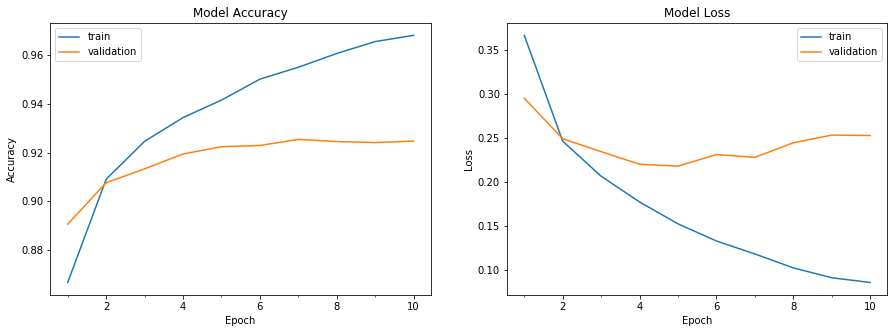

In [40]:
plot_model_history(fit_info2)

##### With Pooling and Dropout added, observe in model accuracy is somewhat consistent in train and validation, but train loss reduces and validation loss increases with more no. of epochs

## Now, to the above model, lets add Data Augmentation 

### 10) Import the ImageDataGenrator from keras and fit the training images

In [41]:
from keras.preprocessing.image import ImageDataGenerator

In [42]:
datagen1 = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=50,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

In [43]:
datagen1.fit(x_train)

[]

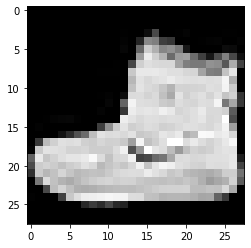

In [44]:
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.plot()

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

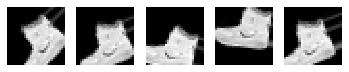

In [45]:
from matplotlib import pyplot as plt
gen = datagen1.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### 11) Run the above model using fit_generator()

In [46]:
x_train.shape[0]

60000

In [47]:
fit_info3 = model2.fit_generator(datagen1.flow(x_train, y_train,batch_size=32),
                                   samples_per_epoch=x_train.shape[0],
                                   epochs=25,
                                   validation_data=(x_test, y_test), callbacks=[early_stopping], verbose=True)

Epoch 1/25
   3/1875 [..............................] - ETA: 1:05 - loss: 4.7831 - accuracy: 0.3021

C:\Dist\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=25, validation_data=(array([[[..., callbacks=[<keras.ca..., verbose=True, steps_per_epoch=1875)`
  after removing the cwd from sys.path.


1875/1875 [==============================] - 73s 39ms/step - loss: 0.9718 - accuracy: 0.6426 - val_loss: 0.4651 - val_accuracy: 0.8385
Epoch 2/25
1875/1875 [==============================] - 73s 39ms/step - loss: 0.7156 - accuracy: 0.7370 - val_loss: 0.4473 - val_accuracy: 0.8370
Epoch 3/25
1875/1875 [==============================] - 74s 40ms/step - loss: 0.6531 - accuracy: 0.7595 - val_loss: 0.4395 - val_accuracy: 0.8396
Epoch 4/25
1875/1875 [==============================] - 76s 41ms/step - loss: 0.6082 - accuracy: 0.7764 - val_loss: 0.4003 - val_accuracy: 0.8560
Epoch 5/25
1875/1875 [==============================] - 74s 40ms/step - loss: 0.5788 - accuracy: 0.7871 - val_loss: 0.3844 - val_accuracy: 0.8623
Epoch 6/25
1875/1875 [==============================] - 74s 40ms/step - loss: 0.5569 - accuracy: 0.7940 - val_loss: 0.4200 - val_accuracy: 0.8472
Epoch 7/25
1875/1875 [==============================] - 74s 40ms/step - loss: 0.5370 - accuracy: 0.8027 - val_loss: 0.4304 - val_accura

###  12) Report the final train and validation accuracy

In [48]:
print('**** Model with Conv, Pooling, Dropout and FC layers and trained on augumented data *****')
train_score = model2.evaluate(x_train, y_train)
print('Train loss:', train_score[0])
print('Train accuracy:', train_score[1])

**** Model with Conv, Pooling, Dropout and FC layers and trained on augumented data *****
60000/60000 [==============================] - 22s 362us/step
Train loss: 0.3823771762172381
Train accuracy: 0.8567500114440918


In [49]:
test_score = model2.evaluate(x_test, y_test)
print('Test loss:', test_score[0])
print('Test accuracy:', test_score[1])

10000/10000 [==============================] - 4s 369us/step
Test loss: 0.4125136831045151
Test accuracy: 0.8525999784469604


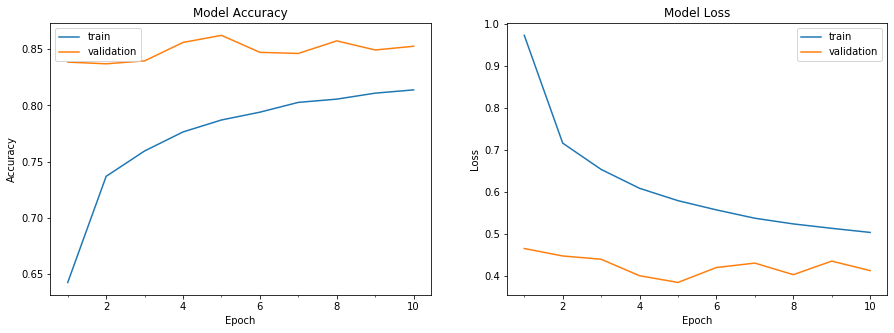

In [50]:
plot_model_history(fit_info3)

##### Observe in model validation accuracy/loss is not consistent, acheives max accuracy and min loss in epoch #5 

##### Predictions for few images in Test set with label names

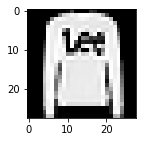

Pullover


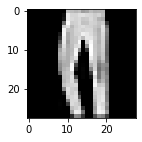

Trouser


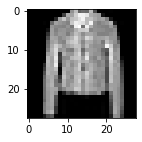

Coat


In [51]:
y_predict = model2.predict(x_test)

plt.figure(figsize=(2,2))
plt.imshow(x_test[1].reshape(28,28),cmap="gray")
plt.show()
print(labelNames[np.argmax(model2.predict(x_test[1].reshape(1,28,28,1)))])

plt.figure(figsize=(2,2))
plt.imshow(x_test[5].reshape(28,28),cmap="gray")
plt.show()
print(labelNames[np.argmax(model2.predict(x_test[5].reshape(1,28,28,1)))])

plt.figure(figsize=(2,2))
plt.imshow(x_test[10].reshape(28,28),cmap="gray")
plt.show()
print(labelNames[np.argmax(model2.predict(x_test[10].reshape(1,28,28,1)))])

In [52]:
from sklearn import metrics
y_pred = []
for val in y_predict:
    y_pred.append(np.argmax(val))

##### Printing the Confusion Matrix

In [53]:
print(metrics.confusion_matrix(np.argmax(y_test,1),y_pred))

[[847   0  11  45   5   0  73   0  18   1]
 [  3 974   0  15   2   0   5   0   1   0]
 [ 13   0 656  10 169   0 140   0  12   0]
 [ 26   5   5 862  44   2  50   0   4   2]
 [  2   2  37  46 813   1  94   0   5   0]
 [  0   0   0   0   0 971   0  27   1   1]
 [198   1  38  32 145   2 554   0  27   3]
 [  0   0   0   0   0  12   0 984   0   4]
 [  2   0   2   1   2   4   2   2 985   0]
 [  2   0   1   0   0   8   0 103   6 880]]


##### Printing the Classification report  

In [54]:
print(metrics.classification_report(np.argmax(y_test,1),y_pred))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      1000
           1       0.99      0.97      0.98      1000
           2       0.87      0.66      0.75      1000
           3       0.85      0.86      0.86      1000
           4       0.69      0.81      0.75      1000
           5       0.97      0.97      0.97      1000
           6       0.60      0.55      0.58      1000
           7       0.88      0.98      0.93      1000
           8       0.93      0.98      0.96      1000
           9       0.99      0.88      0.93      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000



# **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### 1) Import neessary libraries for data augmentation

In [55]:
from keras.preprocessing.image import ImageDataGenerator

### 2) Load CIFAR10 dataset

In [56]:
from keras.datasets import cifar10

In [57]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [58]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

50000 train samples
10000 test samples


In [59]:
print('Dataset Dimension  : ',x_train.shape)
print('No of Samples      : ',x_train.shape[0])

Dataset Dimension  :  (50000, 32, 32, 3)
No of Samples      :  50000


In [60]:
print('Image Dimension    : ',x_train[0].shape)
print('Image Height       : ',x_train[0].shape[0])
print('Image Width        : ',x_train[0].shape[1])
print('No of Channels     : ',x_train[0].shape[2])

Image Dimension    :  (32, 32, 3)
Image Height       :  32
Image Width        :  32
No of Channels     :  3


##### Plotting samples from CIFAR10 dataset

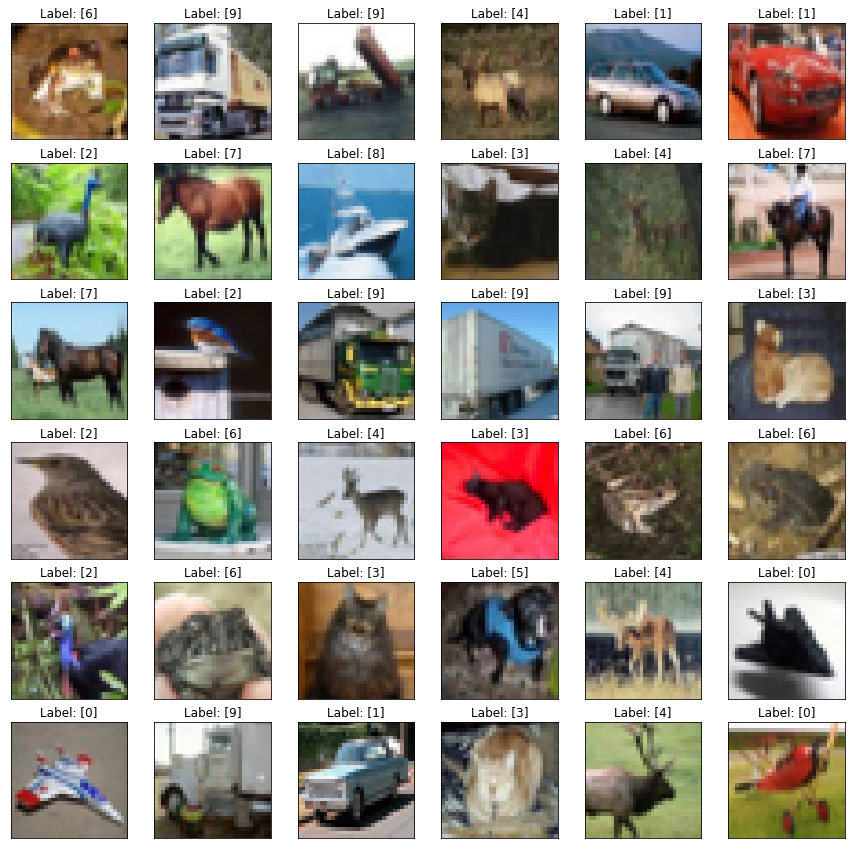

In [61]:
fig=plt.figure(figsize=(15, 15))
columns = 6
rows = 6
for i in range(1, columns*rows +1):
    img = x_train[i-1]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img, cmap='gray')
    plt.title("Label: {}".format(y_train[i-1]))
    plt.xticks([])
    plt.yticks([])
plt.show()

### 3) Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.

[]

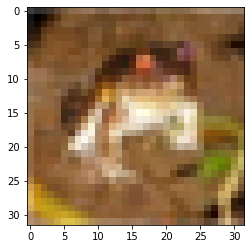

In [62]:
plt.imshow(x_train[0], cmap='gray')
plt.plot()

In [63]:
datagen2 = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False, 
    samplewise_std_normalization=False,  
    zca_whitening=False,  
    rotation_range=90,  # randomly rotate images in the range 45degrees
    width_shift_range=0.3,  # randomly shift images horizontally 
    height_shift_range=0.3,  # randomly shift images vertically 
    horizontal_flip=True,  # randomly flip images horizontally 
    vertical_flip=False,
    data_format="channels_last")  

### 4) Prepare/fit the generator.

In [64]:
datagen2.fit(x_train, augment=True)

[]

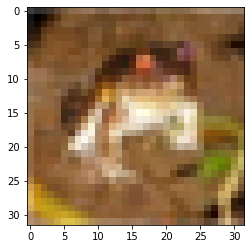

In [65]:
plt.imshow(x_train[0].squeeze(), cmap='gray')
plt.plot()

### 5) Generate 5 images for 1 of the image of CIFAR10 train dataset.

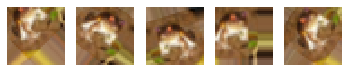

In [66]:
gen = datagen2.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype('uint8'), cmap='gray')
    plt.plot()